In [16]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist 

(X_train, y_train),(X_test,y_test) = mnist.load_data()

print('Train: X = {}, y = {}'.format(X_train.shape, y_train.shape)) 
print('Test: X = {}, y = {}'.format(X_test.shape, y_test.shape))
m = y_test

Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


In [8]:
def plot_input_img(i):
    plt.subplot(int('23' +str(i+1)))
    plt.imshow(X_train[i], cmap = 'binary')
    plt.title(y_train[i])
    plt.show()
     

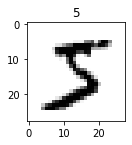

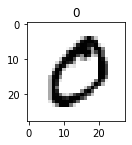

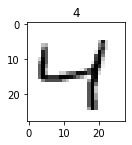

In [9]:
for i in range(3):
    
    plot_input_img(i)

Pre-processing

In [10]:
#Scaling
import tensorflow as tf
import numpy as np

X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255


#reshaping

X_train = np.expand_dims(X_train, -1 )
X_test = np.expand_dims(X_test, -1 )


print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [11]:
# convert class vectors to one hot vector
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

Model Construction

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D


model = tf.keras.models.Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))


Model Summary

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='Adam',metrics=['accuracy'])


In [9]:
#Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

#EarlyStoping
es=EarlyStopping(monitor='val_acc', min_delta = 0.01, patience = 4, verbose = 1)

#ModelCheckpoint
mc = ModelCheckpoint('./bestmodel.h5', monitor ='val_acc', verbose = 1, save_best_only = True)
cb = [es,mc]

Training 

In [10]:
hist = model.fit(X_train, y_train, epochs=25,validation_split = 0.3)
print("The model has successfully trained")



Epoch 1/25
1313/1313 [==============================] - 17s 12ms/step - loss: 0.2217 - accuracy: 0.9323 - val_loss: 0.0765 - val_accuracy: 0.9766
Epoch 2/25
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0740 - accuracy: 0.9767 - val_loss: 0.0648 - val_accuracy: 0.9794
Epoch 3/25
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0561 - accuracy: 0.9824 - val_loss: 0.0528 - val_accuracy: 0.9834
Epoch 4/25
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0446 - accuracy: 0.9863 - val_loss: 0.0447 - val_accuracy: 0.9868
Epoch 5/25
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0385 - accuracy: 0.9879 - val_loss: 0.0428 - val_accuracy: 0.9873
Epoch 6/25
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0336 - accuracy: 0.9889 - val_loss: 0.0414 - val_accuracy: 0.9875
Epoch 7/25
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0300 - accuracy: 0.9902 - val_loss: 0.0418 -

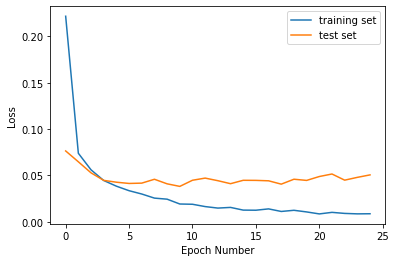

In [21]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(hist.history['loss'], label='training set')
plt.plot(hist.history['val_loss'], label='test set')
plt.legend()

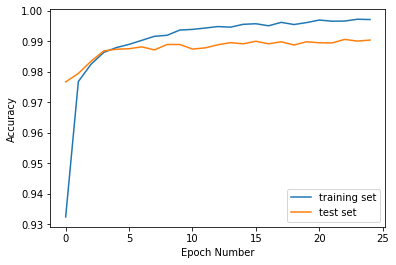

In [22]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label='training set')
plt.plot(hist.history['val_accuracy'], label='test set')
plt.legend()

In [11]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save('bestmodel.h5')
print("Saving the model as bestmodel.h5")

313/313 [==============================] - 1s 5ms/step - loss: 0.0408 - accuracy: 0.9911
Test loss: 0.04080851003527641
Test accuracy: 0.991100013256073
Saving the model as bestmodel.h5


313/313 [==============================] - 1s 4ms/step
The predicted number is  0


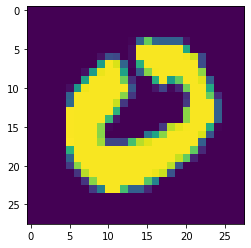

In [14]:
prediction=model.predict(X_test)

prediction=np.argmax(prediction,axis=1)
plt.imshow(X_test[25].reshape(28,28))
print('The predicted number is  '+ str(prediction[25]))

In [26]:
prediction.shape

(10000,)

In [19]:
m.shape

(10000,)

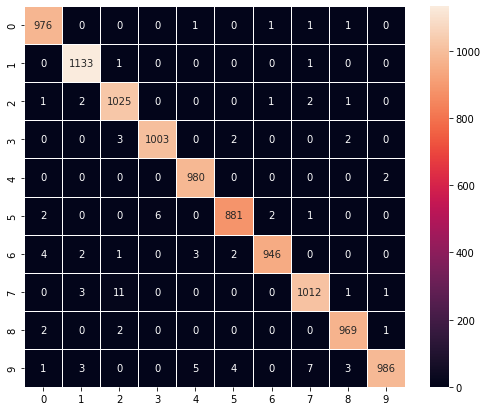

In [20]:
import seaborn as sn
confusion_matrix = tf.math.confusion_matrix(m, prediction)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap( confusion_matrix, annot=True, linewidths=.5, fmt="d", square=True, ax=ax)
plt.show()

Digit-recognition-GUI-with-tkinter

In [32]:
from tkinter import *

import cv2
import numpy as np
from PIL import ImageGrab
from keras.models import load_model
import webbrowser

model = load_model('bestmodel.h5')
image_folder = r'C:\Users\baymu\AppData\Local\Programs\Python\Python310\img'

root = Tk()
root.resizable(0, 0)
root.title("Digit Recognition System")

lastx, lasty = None, None
image_number = 0

cv = Canvas(root, width=800, height=600, bg='white')
cv.grid(row=0, column=0, pady=2, sticky=NSEW, columnspan=2)


def clear_widget():
    global cv
    cv.delete('all')


def draw_lines(event):
    global lastx, lasty
    x, y = event.x, event.y
    cv.create_line((lastx, lasty, x, y), width=8, fill='black', capstyle=ROUND, smooth=TRUE, splinesteps=12)
    lastx, lasty = x, y


def activate_event(event):
    global lastx, lasty
    cv.bind('<B1-Motion>', draw_lines)
    lastx, lasty = event.x, event.y


cv.bind('<Button-1>', activate_event)


def Recognize_Digit():
    global image_number
    filename = f'img_{image_number}.png'
    widget = cv

    x = root.winfo_rootx() + widget.winfo_rootx()
    y = root.winfo_rooty() + widget.winfo_rooty()
    x1 = x + widget.winfo_width()
    y1 = y + widget.winfo_height()
    print(x, y, x1, y1)

    # get image and save
    ImageGrab.grab().crop((x, y, x1, y1)).save(image_folder + filename)

    image = cv2.imread(image_folder + filename, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
    ret, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    contours = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        # make a rectangle box around each curve
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 1)

        # Cropping out the digit from the image corresponding to the current contours in the for loop
        digit = th[y:y + h, x:x + w]

        # Resizing that digit to (18, 18)
        resized_digit = cv2.resize(digit, (18, 18))

        # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
        padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values=0)

        digit = padded_digit.reshape(1, 28, 28, 1)
        digit = digit / 255.0

        pred = model.predict([digit])[0]
        final_pred = np.argmax(pred)

        data = str(final_pred) + ' ' + str(int(max(pred) * 100)) + '%'

        font = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 0.5
        color = (255, 0, 0)
        thickness = 1
        cv2.putText(image, data, (x, y - 5), font, fontScale, color, thickness)

    cv2.imshow('Predictions', image)
    cv2.waitKey(0)
    
def callback():
        webbrowser.open_new(r"www.google.com")    
btn_save = Button(text='Recognize Digits',width=15, height=3, command=Recognize_Digit)
btn_save.grid(row=2, column=0, pady=1, padx=1)
button_clear = Button(text='Clear Output',width=15, height=3, command=clear_widget)
button_clear.grid(row=2, column=1, pady=1, padx=1)
button_info = Button(text='', width=15, height=2, command=callback)
button_info.grid(row=3, column=0, pady=1, padx=1)

root.mainloop()

224 272 1028 876
1/1 [==============================] - 0s 30ms/step
224 272 1028 876
1/1 [==============================] - 0s 63ms/step
224 272 1028 876
1/1 [==============================] - 0s 36ms/step
